In [11]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [12]:
join_type = ['inner']
features_data = pd.read_csv("Data_set/Features data set.csv")
sales_data = pd.read_csv("Data_set/sales data-set.csv")
Total_Weekly_Sales= sales_data[['Date', 'Weekly_Sales']].groupby(['Date']).sum().reset_index()
Total_Weekly_Sales.rename(mapper={'Weekly_Sales': 'Total_Weekly_Sales'}, axis=1, inplace=True)
sales_data = pd.merge(sales_data, Total_Weekly_Sales, how=join_type[0], on=['Date'])
# TOTAL WEEKLY MARKDOWN
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features_data[markdown_columns] = features_data[markdown_columns].fillna(value=0)
features_data['MarkDown'] = features_data['MarkDown1'] + features_data['MarkDown2'] + \
features_data['MarkDown3'] + features_data['MarkDown4'] + features_data['MarkDown5']

total_weekly_features= features_data[['Date', 'MarkDown']].groupby(['Date']).sum().reset_index()
total_weekly_features.rename(mapper={'MarkDown': 'Total_Weekly_MarkDown'}, axis=1, inplace=True)
features_data = pd.merge(features_data, total_weekly_features, how=join_type[0], on=['Date'])

In [13]:
join_columns = ['Date', 'Store', 'IsHoliday']
weekly_sales_data = pd.merge(features_data, sales_data, how=join_type[0], on=join_columns)
weekly_sales_data['Date'] = pd.to_datetime(weekly_sales_data['Date'])
weekly_sales_data['Date'] = weekly_sales_data['Date'].dt.date

In [14]:
weekly_sales_subset.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,MarkDown,Total_Weekly_MarkDown,Dept,Weekly_Sales,Total_Weekly_Sales
2955,1,2010-12-02,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.24217,8.106,True,0.0,0.0,1,46039.49,48336677.63
2956,1,2010-12-02,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.24217,8.106,True,0.0,0.0,2,44682.74,48336677.63
2957,1,2010-12-02,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.24217,8.106,True,0.0,0.0,3,10887.84,48336677.63
2958,1,2010-12-02,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.24217,8.106,True,0.0,0.0,4,35351.21,48336677.63
2959,1,2010-12-02,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.24217,8.106,True,0.0,0.0,5,29620.81,48336677.63


In [15]:
weekly_sales_subset = weekly_sales_data[weekly_sales_data.IsHoliday==True]

In [16]:
select_columns = ['Total_Weekly_MarkDown', 'Date', 'Total_Weekly_Sales']
weekly_sales_subset = weekly_sales_subset[select_columns]

In [17]:
weekly_sales_subset.drop_duplicates(keep='first', inplace=True)
weekly_sales_subset.sort_values(by='Date', inplace=True)
weekly_sales_subset.reset_index(inplace=True)
weekly_sales_subset.drop(columns=['index'], inplace=True)

In [18]:
Total_Sales = weekly_sales_subset[['Date','Total_Weekly_Sales']].set_index('Date')
Total_Markdown = weekly_sales_subset[['Date','Total_Weekly_MarkDown']].set_index('Date')

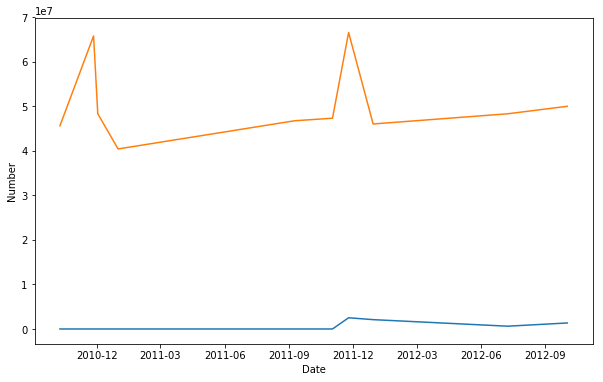

In [19]:
plt.xlabel("Date")
plt.ylabel("Number")
plt.plot(Total_Markdown)
plt.plot(Total_Sales)